# Домашняя работа №3
# Пешков Максим
## БЭК 181

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import time
from tqdm import tqdm_notebook as tqdm
from scipy.optimize import minimize
import scipy.stats as stats
from scipy.stats.stats import pearsonr

# Задача 1
## Парадокс инспектора

### a)

In [2]:
np.random.seed(8)
avt = []
for _ in range(int(1e4)):
    s = 0
    i = 0
    while s < 720:
        s += (np.random.binomial(n=1, p=0.5) + 1) * 5
        i += 1
    avt.append(i)

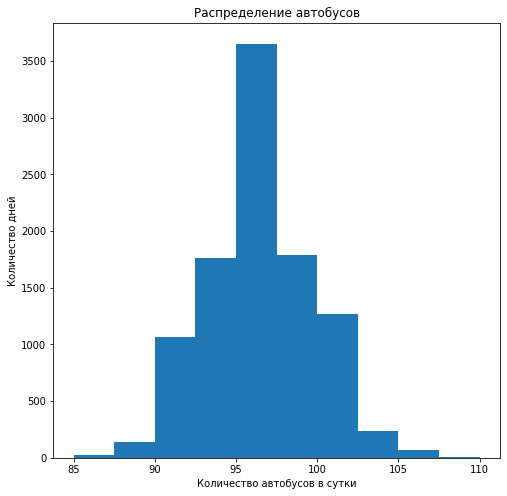

In [3]:
plt.subplots(figsize=(8,8))
plt.hist(np.array(avt))
plt.xlabel('Количество автобусов в сутки')
plt.ylabel('Количество дней')
plt.title('Распределение автобусов');

Визуально похоже на нормальное распределение

### б)

In [4]:
np.random.seed(8)
timon_pas = []
for _ in range(int(1e4)):
    pas_den = []
    s = 0
    i = 0
    while s < 720:
        t = (np.random.binomial(n=1, p=0.5) + 1) * 5
        s += t
        pas_den.append(t)
    timon_pas.append(np.random.choice(pas_den))

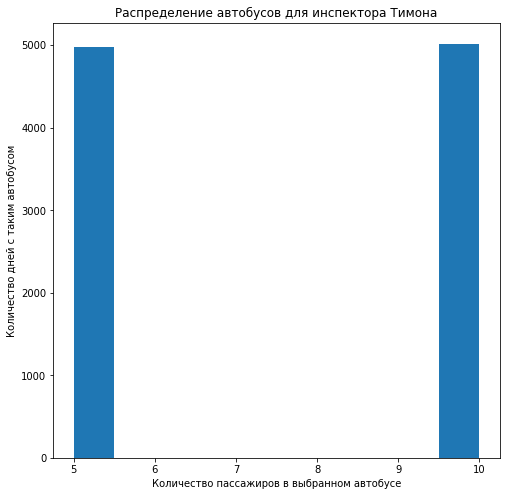

In [5]:
plt.subplots(figsize=(8,8))
plt.hist(np.array(timon_pas))
plt.xlabel('Количество пассажиров в выбранном автобусе')
plt.ylabel('Количество дней с таким автобусом')
plt.title('Распределение автобусов для инспектора Тимона');

In [6]:
print('Оценка матожидания',np.array(timon_pas).mean())
print('Оценка дисперсии',np.array(timon_pas).var())

Оценка матожидания 7.509
Оценка дисперсии 6.249918999999999


### в)

In [7]:
np.random.seed(8)
pumba_pas = []
for _ in range(int(1e4)):
    a = np.random.randint(0, 720)
    pas_avt = []
    s = 0
    while s < 720:
        t = (np.random.binomial(n=1, p=0.5) + 1) * 5
        s += t
        if s >= a:
            pas_avt.append(t)
    pumba_pas.append(pas_avt[0])

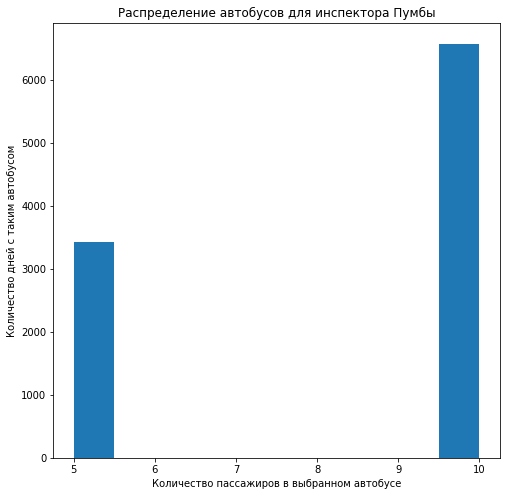

In [8]:
plt.subplots(figsize=(8,8))
plt.hist(np.array(pumba_pas))
plt.xlabel('Количество пассажиров в выбранном автобусе')
plt.ylabel('Количество дней с таким автобусом')
plt.title('Распределение автобусов для инспектора Пумбы');

In [9]:
print('Оценка матожидания',np.array(pumba_pas).mean())
print('Оценка дисперсии',np.array(pumba_pas).var())

Оценка матожидания 8.2885
Оценка дисперсии 5.62826775


### г)

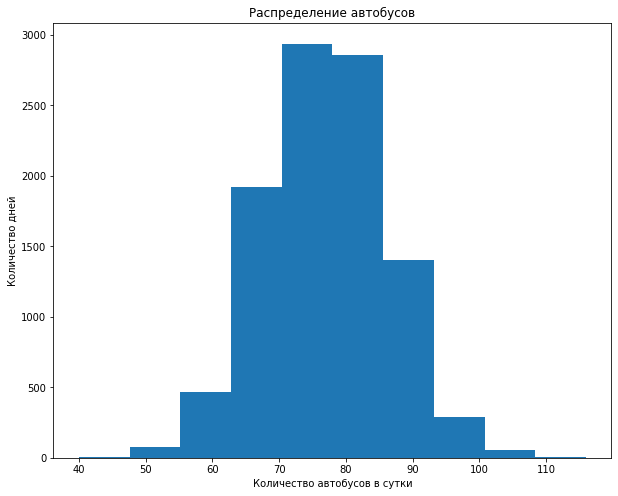

In [10]:
np.random.seed(8)
plt.subplots(figsize=(10,8))
avt1 = []
for _ in range(int(1e4)):
    s = 0
    i = 0
    while s < 720:
        s += int(np.random.exponential(10))
        i += 1
    avt1.append(i)
plt.hist(np.array(avt1))
plt.xlabel('Количество автобусов в сутки')
plt.ylabel('Количество дней')
plt.title('Распределение автобусов');

Тоже визуально нормальное распределение

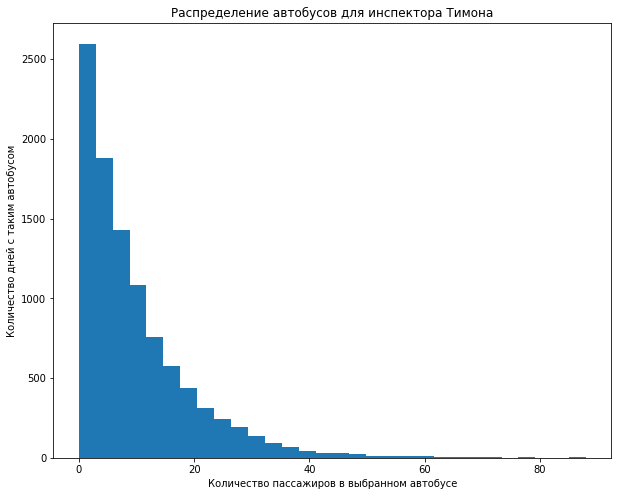

In [11]:
np.random.seed(8)
plt.subplots(figsize=(10,8))
timon_pas1 = []
for _ in range(int(1e4)):
    pas_den = []
    s = 0
    i = 0
    while s < 720:
        t = int(np.random.exponential(10))
        s += t
        pas_den.append(t)
    timon_pas1.append(np.random.choice(pas_den))
plt.hist(np.array(timon_pas1), bins=30)
plt.xlabel('Количество пассажиров в выбранном автобусе')
plt.ylabel('Количество дней с таким автобусом')
plt.title('Распределение автобусов для инспектора Тимона');

In [12]:
print('Оценка матожидания',np.array(timon_pas1).mean())
print('Оценка дисперсии',np.array(timon_pas1).var())

Оценка матожидания 9.5654
Оценка дисперсии 100.73332283999999


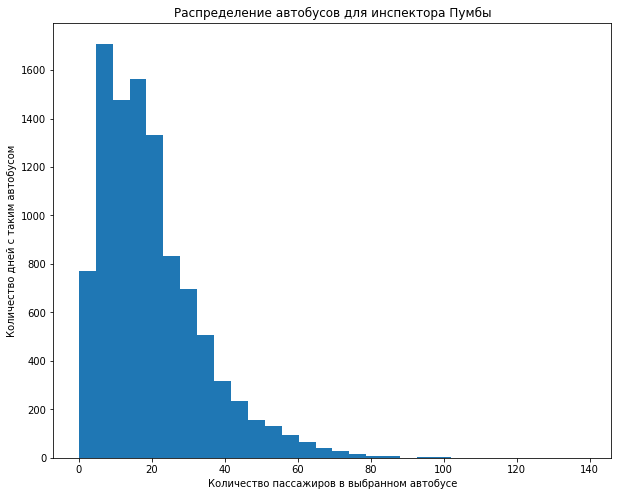

In [13]:
np.random.seed(8)
plt.subplots(figsize=(10,8))
pumba_pas1 = []
for _ in range(int(1e4)):
    a = np.random.randint(0, 720)
    pas_avt = []
    s = 0
    while s < 720:
        t = int(np.random.exponential(10))
        s += t
        if s >= a:
            pas_avt.append(t)
    pumba_pas1.append(pas_avt[0])
plt.hist(np.array(pumba_pas1), bins=30)
plt.xlabel('Количество пассажиров в выбранном автобусе')
plt.ylabel('Количество дней с таким автобусом')
plt.title('Распределение автобусов для инспектора Пумбы');

In [14]:
print('Оценка матожидания',np.array(pumba_pas1).mean())
print('Оценка дисперсии',np.array(pumba_pas1).var())

Оценка матожидания 19.889
Оценка дисперсии 197.930279


**Итого**, распределения отличаются от пунктов а и б (как по гистограммам, так и по математическим ожиданиям и дисперсиям), но при этом, они также отличаются.

При этом для Пумбы математическое ожидание также больше, чем у Тимона, хотя в этом случае у Тимона дисперсия меньше, чем у Пумбы.

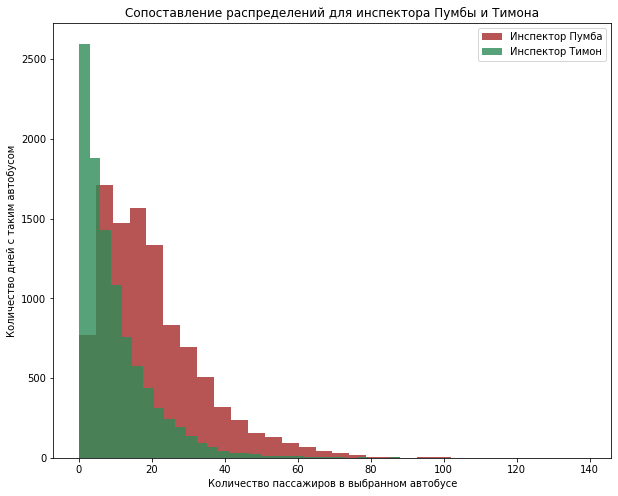

In [15]:
plt.subplots(figsize=(10,8))
plt.hist(np.array(pumba_pas1), bins=30, color = 'brown', alpha=0.8, label = 'Инспектор Пумба')
plt.hist(np.array(timon_pas1), bins=30, color = 'seagreen', alpha=0.8, label = 'Инспектор Тимон')
plt.xlabel('Количество пассажиров в выбранном автобусе')
plt.legend()
plt.ylabel('Количество дней с таким автобусом')
plt.title('Сопоставление распределений для инспектора Пумбы и Тимона');

# Задача 2
## Парадокс Хуана Мануэля Родригеса Паррондо.

### a)

In [16]:
np.random.seed(8)
all_welfare = []
for _ in range(int(1e4)):
    s = np.random.choice(2, 1000, p=[0.51, 0.49]) * 2 - 1
    all_welfare.append(np.cumsum(s) + 1000)

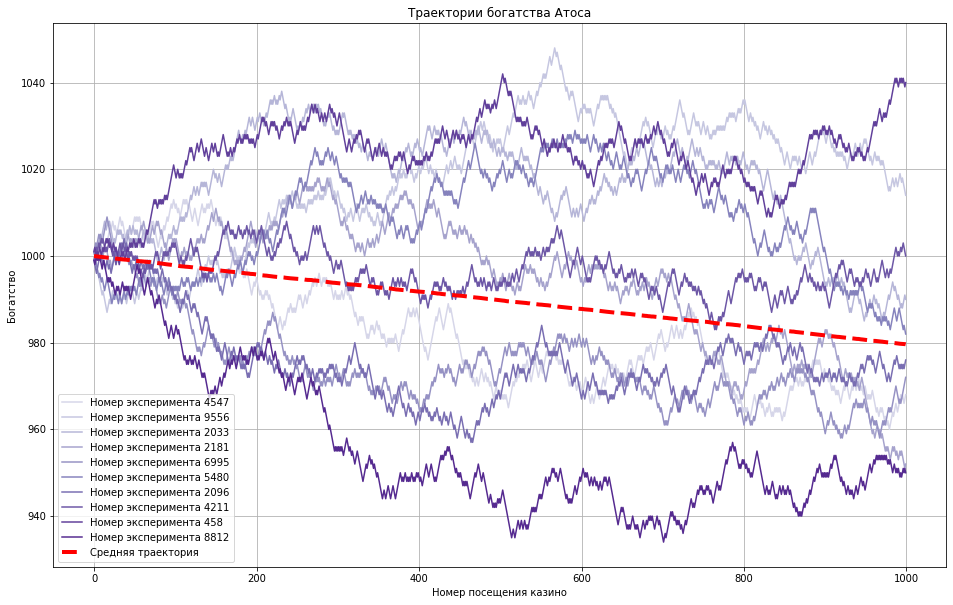

In [17]:
np.random.seed(8)
cmap = plt.cm.get_cmap('Purples')
fig, ax = plt.subplots(figsize = (16,10))
for i in range(10):
    index = np.random.randint(0, 10000)
    c = cmap(float(i + 4)/(15))
    plt.plot(all_welfare[index], color = c, label = 'Номер эксперимента {:}'.format(index))
plt.plot(np.mean(all_welfare, axis=0), 'r--', label = 'Средняя траектория',linewidth=4)
ax.grid()
plt.legend()
plt.xlabel('Номер посещения казино')
plt.ylabel('Богатство')
plt.title('Траектории богатства Атоса');

### б)

In [18]:
np.random.seed(8)
w = [-1, 1]
wel = []
for _ in tqdm(range(int(1e4))):
    den = [1000]
    zal1 = np.random.choice(w, 1000, p=[0.91, 0.09])
    zal2 = np.random.choice(w, 1000, p=[0.26, 0.74])
    for i in range(1000):
        if den[i] % 3 == 0:
            den.append(den[i]+zal1[i])
        else:
            den.append(den[i]+zal2[i])
    wel.append(den)

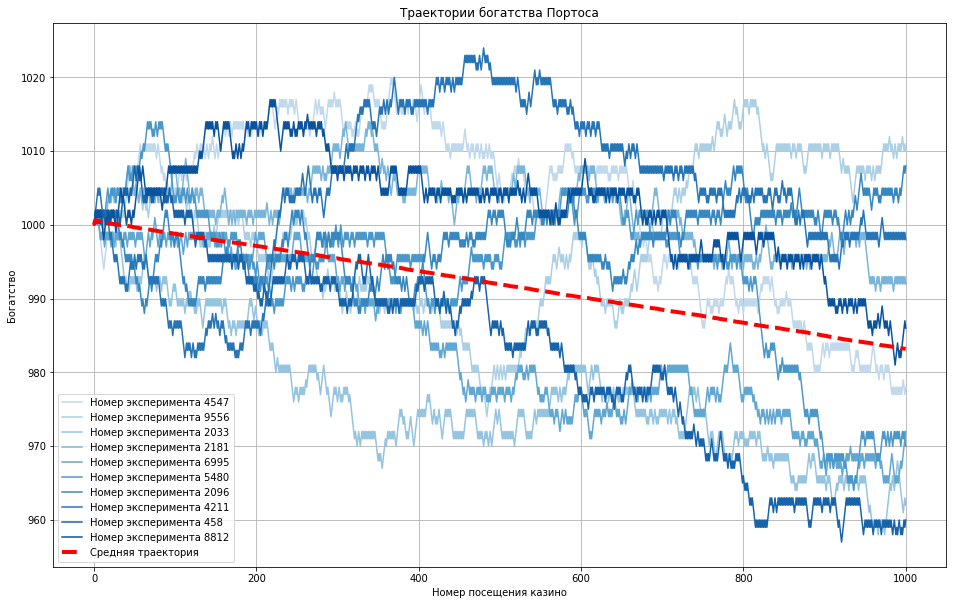

In [19]:
np.random.seed(8)
cmap = plt.cm.get_cmap('Blues')
fig, ax = plt.subplots(figsize = (16,10))
for i in range(10):
    index = np.random.randint(0, 10000)
    c = cmap(float(i + 4)/(15))
    plt.plot(wel[index], color = c, label = 'Номер эксперимента {:}'.format(index))
plt.plot(np.mean(wel, axis=0), 'r--', label = 'Средняя траектория', linewidth=4)
ax.grid()
plt.legend()
plt.xlabel('Номер посещения казино')
plt.ylabel('Богатство')
plt.title('Траектории богатства Портоса');

### в)

In [20]:
np.random.seed(8)
w = [-1, 1]
wealth = []
for _ in tqdm(range(int(1e4))):
    den = [1000]
    b_zal1 = np.random.choice(w, 1000, p=[0.91, 0.09])
    b_zal2 = np.random.choice(w, 1000, p=[0.26, 0.74])
    a = np.random.choice(w, 1000, p=[0.51, 0.49])
    indices = np.random.choice(2, 1000, p=[0.5, 0.5])
    for i in range(1000):
        ind = indices[i]
        if ind == 0:
            den.append(den[i]+a[i])
        else:
            if den[i] % 3 == 0:
                den.append(den[i]+b_zal1[i])
            else:
                den.append(den[i]+b_zal2[i])
    wealth.append(den)

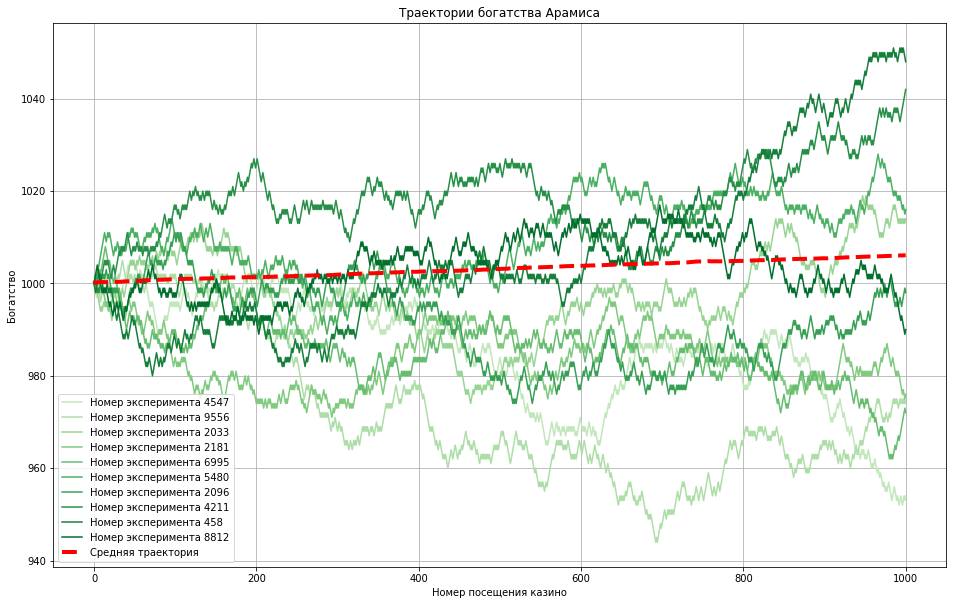

In [21]:
np.random.seed(8)
cmap = plt.cm.get_cmap('Greens')
fig, ax = plt.subplots(figsize = (16,10))
for i in range(10):
    index = np.random.randint(0, 10000)
    c = cmap(float(i + 4)/(15))
    plt.plot(wealth[index], color=c, label = 'Номер эксперимента {:}'.format(index))
plt.plot(np.mean(wealth, axis=0), 'r--', label = 'Средняя траектория', linewidth=4)
ax.grid()
plt.legend()
plt.xlabel('Номер посещения казино')
plt.ylabel('Богатство')
plt.title('Траектории богатства Арамиса');

# Задача 3
## Парадокс Берксона

### a)

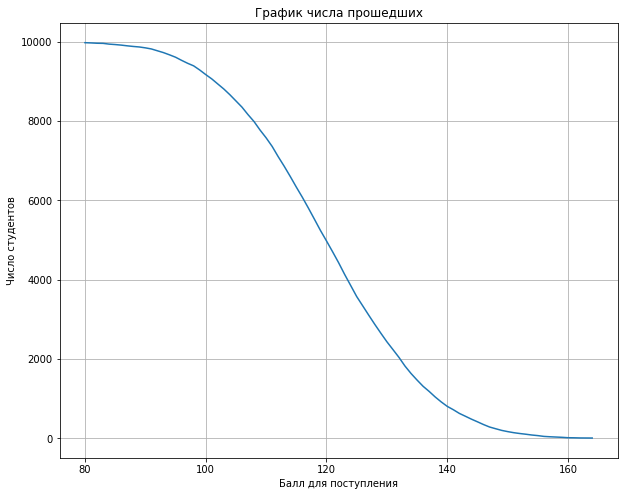

In [22]:
np.random.seed(8)
fig, ax = plt.subplots(figsize = (10, 8))
children = np.random.normal(loc=60, scale=10, size=(10**4, 2))
points_child = np.sum(children, axis=1)
passed_points = np.arange(80, 165, 1)
points = []
for point in passed_points:
    points.append(len(points_child[np.where(points_child > point)]))
plt.plot(passed_points, points)
ax.grid()
plt.xlabel('Балл для поступления')
plt.ylabel('Число студентов')
plt.title('График числа прошедших');

### б)

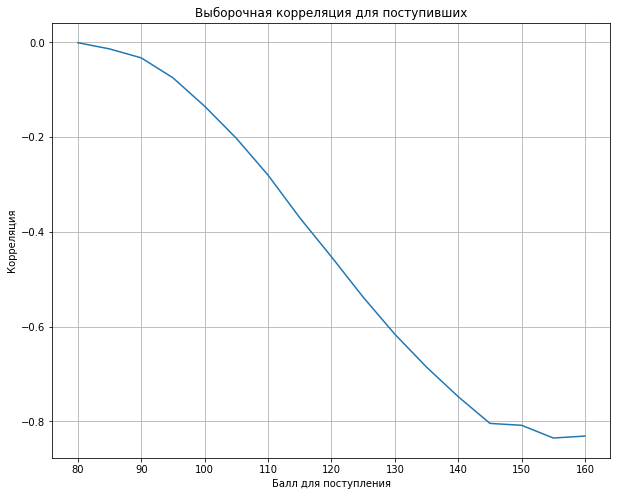

In [23]:
np.random.seed(8)
fig, ax = plt.subplots(figsize = (10,8))
children = np.random.normal(loc=60, scale=10, size=(10**4, 2))
points_child = np.sum(children, axis=1)
passed_points = np.arange(80, 165, 5)
corr = []
for point in passed_points:
    students = children[np.where(points_child > point)]
    s_math = students.reshape(-1,1)[::2]
    s_rus = students.reshape(-1,1)[1::2]
    corr.append(pearsonr(s_math, s_rus)[0])
plt.plot(passed_points, corr)
ax.grid()
plt.xlabel('Балл для поступления')
plt.ylabel('Корреляция')
plt.title('Выборочная корреляция для поступивших');

### в)

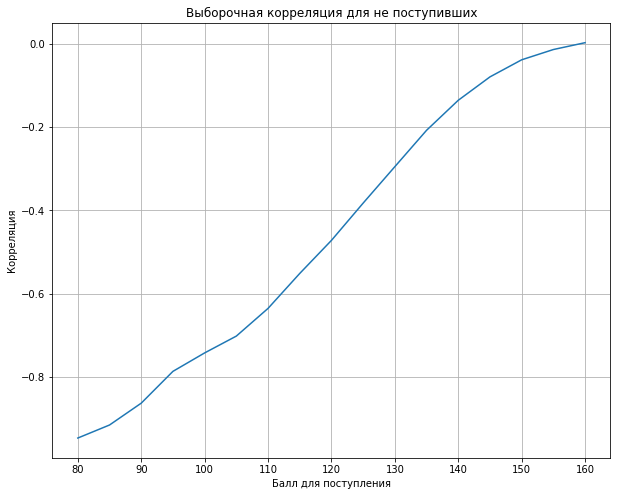

In [24]:
np.random.seed(8)
fig, ax = plt.subplots(figsize = (10,8))
children = np.random.normal(loc=60, scale=10, size=(10**4, 2))
points_child = np.sum(children, axis=1)
passed_points = np.arange(80, 165, 5)
corr = []
for point in passed_points:
    students = children[np.where(points_child <= point)]
    s_math = students.reshape(-1,1)[::2]
    s_rus = students.reshape(-1,1)[1::2]
    corr.append(pearsonr(s_math, s_rus)[0])
plt.plot(passed_points, corr)
ax.grid()
plt.xlabel('Балл для поступления')
plt.ylabel('Корреляция')
plt.title('Выборочная корреляция для не поступивших');

# Задача 4
## Парадокс Штайна

### a)

In [25]:
mu_init = 0
def minus_lk(a, mu, sigma=10):
    n = len(a)
    func = -n/2*np.log(2*(np.pi)) - n/2*np.log(sigma**2) - (1/(2*(sigma**2)))*np.sum((a-mu)**2)
    return -func

In [26]:
optim_res = minimize(minus_lk, mu_init, args=[10, 6, 2])
optim_res.x

array([6.00000148])

In [27]:
np.random.seed(8)
all_carantine = []
for i in range(int(1e4)):
    X = np.random.normal(loc=60, scale=10, size=100)
    Y = np.random.normal(loc=70, scale=10, size=100)
    Z = np.random.normal(loc=80, scale=10, size=100)
    all_carantine.append([X, Y, Z])

In [28]:
X_hat = []
Y_hat = []
Z_hat = []
for i in tqdm(range(int(1e4))):
    cara = all_carantine[i]
    optim_res_x = minimize(minus_lk, mu_init, args=cara[0])
    x_find = optim_res_x.x
    optim_res_x = minimize(minus_lk, mu_init, args=cara[1])
    y_find = optim_res_x.x
    optim_res_x = minimize(minus_lk, mu_init, args=cara[2])
    z_find = optim_res_x.x
    X_hat.append(float(x_find))
    Y_hat.append(float(y_find))
    Z_hat.append(float(z_find))

In [29]:
X_hat = np.array(X_hat)
Y_hat = np.array(Y_hat)
Z_hat = np.array(Z_hat)

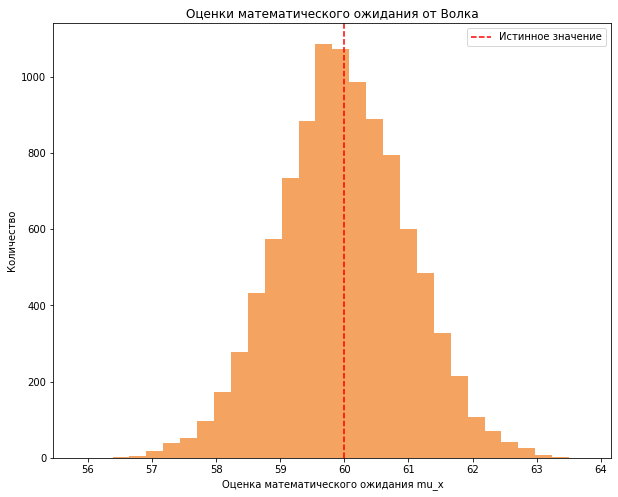

In [30]:
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(X_hat, bins=30, color='sandybrown')
plt.axvline(60, color='red', linestyle ='--', label = 'Истинное значение')
plt.legend()
plt.xlabel('Оценка математического ожидания mu_x')
plt.ylabel('Количество')
plt.title('Оценки математического ожидания от Волка');

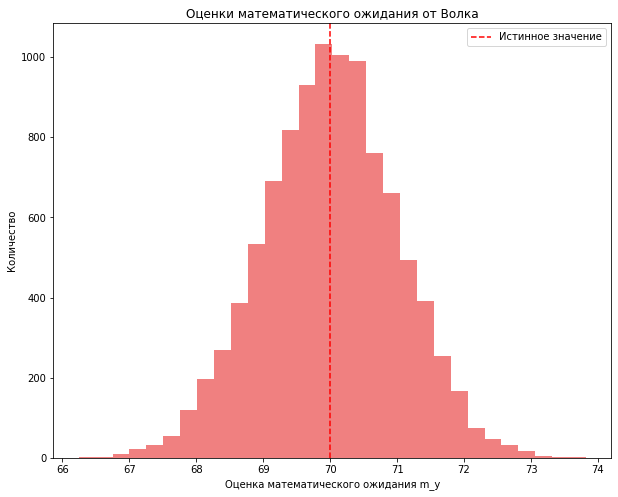

In [31]:
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(Y_hat, bins=30, color = 'lightcoral')
plt.axvline(70, color='red', linestyle ='--', label = 'Истинное значение')
plt.legend()
plt.xlabel('Оценка математического ожидания m_y')
plt.ylabel('Количество')
plt.title('Оценки математического ожидания от Волка');

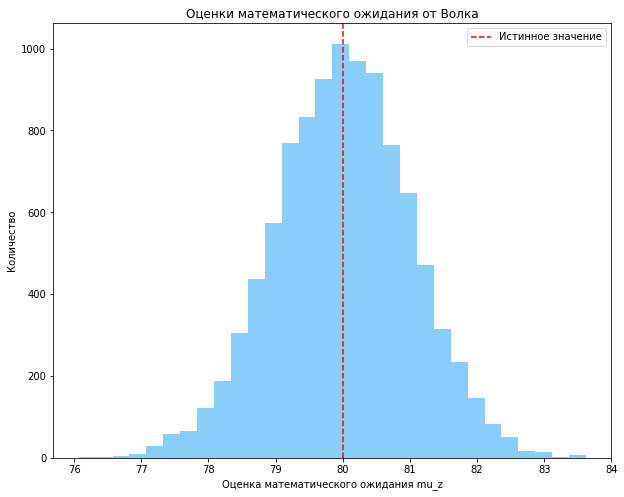

In [32]:
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(Z_hat, bins=30, color = 'lightskyblue')
plt.axvline(80, color='red', linestyle ='--', label = 'Истинное значение')
plt.legend()
plt.xlabel('Оценка математического ожидания mu_z')
plt.ylabel('Количество')
plt.title('Оценки математического ожидания от Волка');

### б)

In [33]:
S = (X_hat-60) ** 2 + (Y_hat-70) ** 2 + (Z_hat-80) ** 2 
s_hat = S.mean()
print('математическое ожидание квадратичной ошибки', s_hat)

математическое ожидание квадратичной ошибки 3.005858435890332


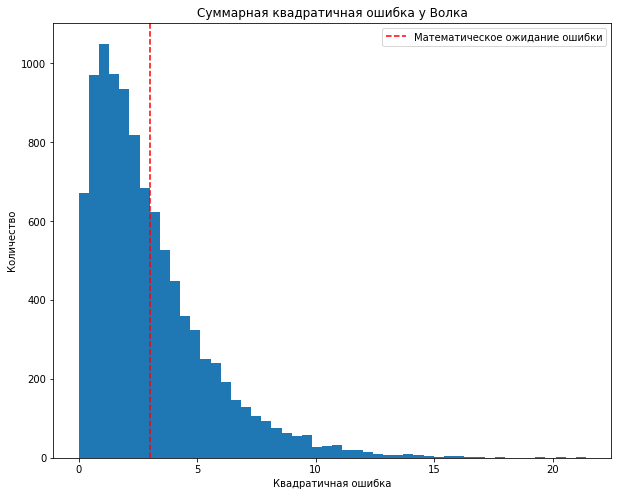

In [34]:
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(S, bins=50)
plt.axvline(s_hat, color='red', linestyle ='--', label = 'Математическое ожидание ошибки')
plt.legend()
plt.xlabel('Квадратичная ошибка')
plt.ylabel('Количество')
plt.title('Суммарная квадратичная ошибка у Волка');

### в)

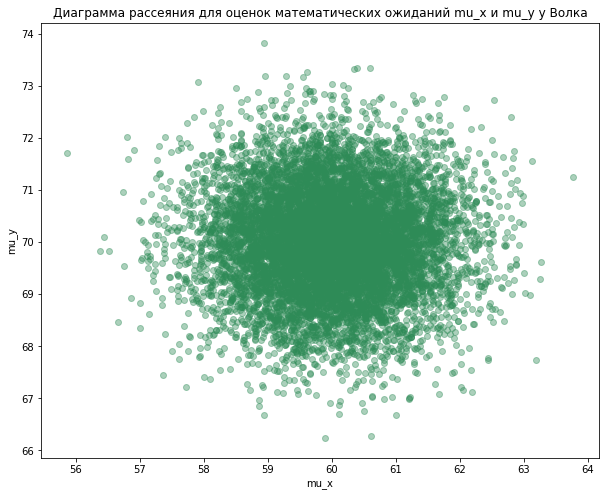

In [35]:
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(X_hat, Y_hat, color = 'seagreen', alpha=0.4)
plt.xlabel('mu_x')
plt.ylabel('mu_y')
plt.title('Диаграмма рассеяния для оценок математических ожиданий mu_x и mu_y у Волка');

In [36]:
print('Выборочная корреляци', pearsonr(X_hat, Y_hat)[0])

Выборочная корреляци -0.008659339112618056


### г)

In [37]:
np.linalg.norm([0,1,1])**2

2.0000000000000004

In [38]:
def lis(v):
    l = (1-1/np.linalg.norm(v)**2) * v
    return l

In [39]:
v_x_hat = lis(X_hat)
v_y_hat = lis(Y_hat)
v_z_hat = lis(Z_hat)

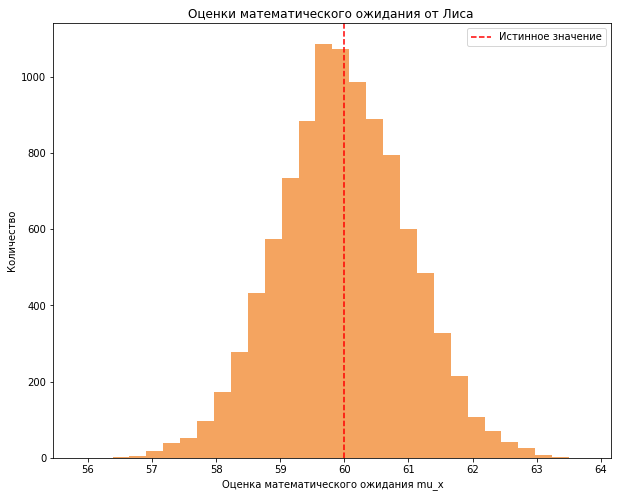

In [40]:
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(v_x_hat, bins=30, color='sandybrown')
plt.axvline(60, color='red', linestyle ='--', label = 'Истинное значение')
plt.legend()
plt.xlabel('Оценка математического ожидания mu_x')
plt.ylabel('Количество')
plt.title('Оценки математического ожидания от Лиса ');

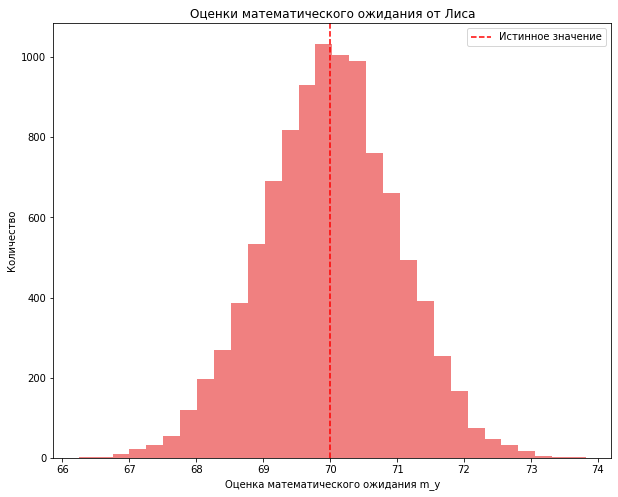

In [41]:
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(v_y_hat, bins=30, color = 'lightcoral')
plt.axvline(70, color='red', linestyle ='--', label = 'Истинное значение')
plt.legend()
plt.xlabel('Оценка математического ожидания m_y')
plt.ylabel('Количество')
plt.title('Оценки математического ожидания от Лиса');

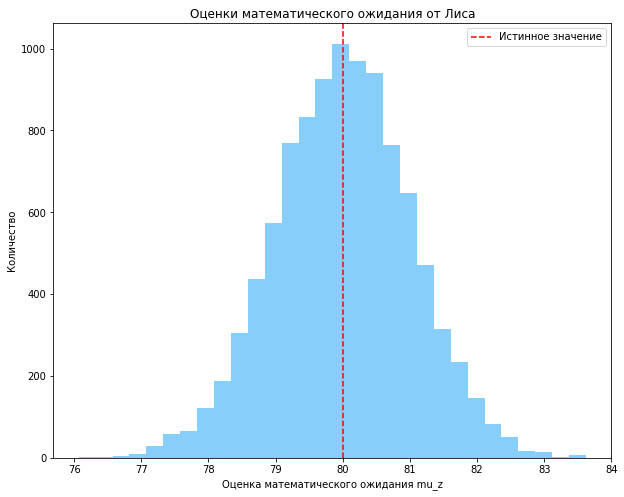

In [42]:
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(v_z_hat, bins=30, color = 'lightskyblue')
plt.axvline(80, color='red', linestyle ='--', label = 'Истинное значение')
plt.legend()
plt.xlabel('Оценка математического ожидания mu_z')
plt.ylabel('Количество')
plt.title('Оценки математического ожидания от Лиса');

In [43]:
S_lis = (v_x_hat-60) ** 2 + (v_y_hat-70) ** 2 + (v_z_hat-80) ** 2 
s_hat_lis = S_lis.mean()
print('математическое ожидание квадратичной ошибки', s_hat_lis)

математическое ожидание квадратичной ошибки 3.005858347363189


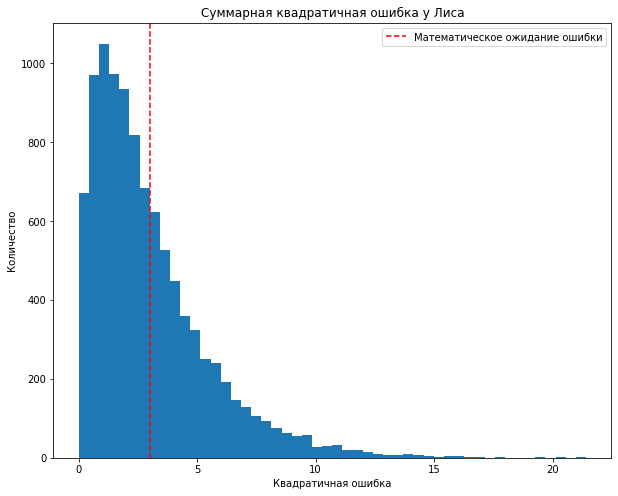

In [44]:
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(S_lis, bins=50)
plt.axvline(s_hat_lis, color='red', linestyle ='--', label = 'Математическое ожидание ошибки')
plt.legend()
plt.xlabel('Квадратичная ошибка')
plt.ylabel('Количество')
plt.title('Суммарная квадратичная ошибка у Лиса');

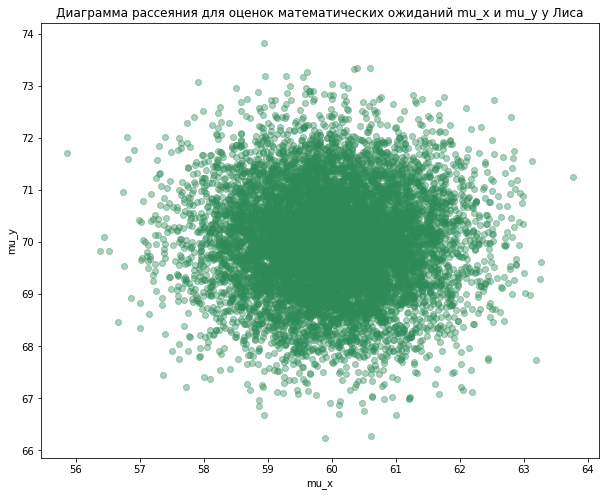

In [45]:
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(v_x_hat, v_y_hat, color = 'seagreen', alpha=0.4)
plt.xlabel('mu_x')
plt.ylabel('mu_y')
plt.title('Диаграмма рассеяния для оценок математических ожиданий mu_x и mu_y у Лиса');

In [46]:
print('Выборочная корреляци', pearsonr(v_x_hat, v_y_hat)[0])

Выборочная корреляци -0.008659339112618005


Лис чуть-чуть лучше имеет квадратичную ошибку (меньше), а во всем остальном они почти идентичны

### д)

In [47]:
S_volk_x = (X_hat-60) ** 2
print('Ошибка волка для Ниф-Нифа', S_volk_x.mean())

Ошибка волка для Ниф-Нифа 1.0022005870704518


In [48]:
S_lis_x = (v_x_hat-60) ** 2
print('Ошибка лиса для Ниф-Нифа', S_lis_x.mean())

Ошибка лиса для Ниф-Нифа 1.0022005896657082


Для *Ниф-Нифа* у **Волка** лучше качество (ошибка меньше).

In [49]:
print('Ошибка волка для вектора Трех Поросят', s_hat)

Ошибка волка для вектора Трех Поросят 3.005858435890332


In [50]:
print('Ошибка лиса для вектора Трех Поросят', s_hat_lis)

Ошибка лиса для вектора Трех Поросят 3.005858347363189


Для *вектора накаченности у Трех Поросят* качество лучше у **Лиса** (ошибка меньше)